In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

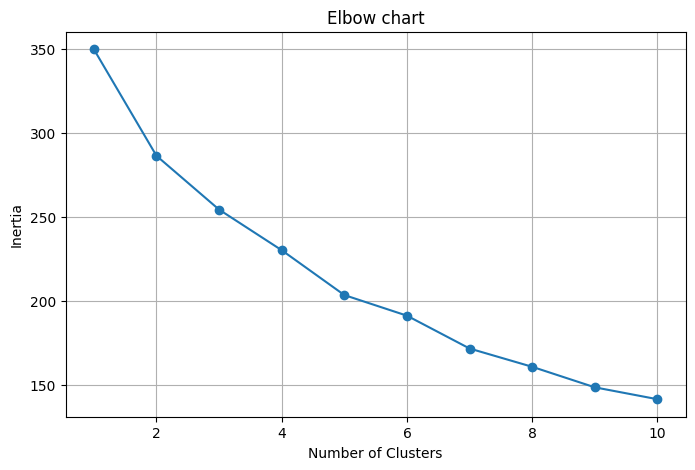

In [2]:
df = pd.read_csv("data/caribbean_ports.csv")

numeric_cols = [
    'avg_annual_visitors', 'avg_port_fee_usd', 'local_attractions_score',
    'avg_customer_satisfaction', 
    'avg_disembark_rate', 'avg_shore_spend_per_passenger', 'seasonality_score'
]
df_numeric = df[numeric_cols].dropna()

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

inertia = []
for k in range(1, 11):
    model = KMeans(n_clusters=k, random_state=654)
    model.fit(df_scaled)
    inertia.append(model.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow chart')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [15]:
#apply k-means
k = 5
kmeans = KMeans(n_clusters=k, random_state=654)
df["cluster"] = kmeans.fit_predict(df_scaled)

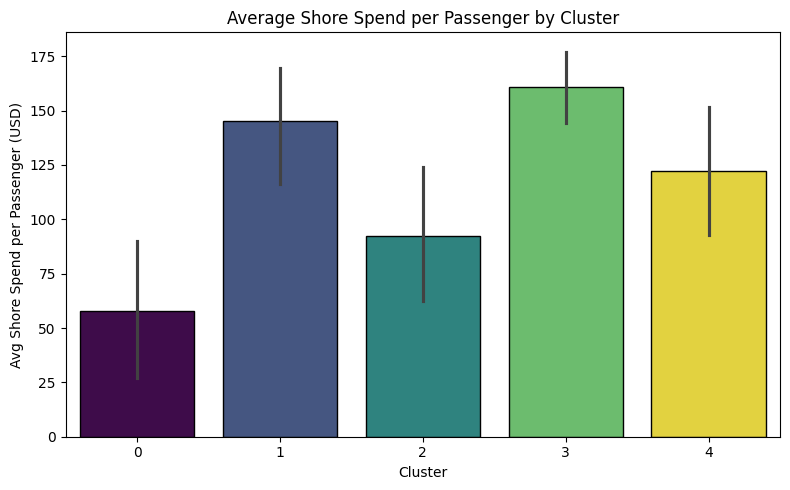

In [23]:
plt.figure(figsize=(8, 5))
sns.barplot(
    data=df,
    x='cluster',
    y='avg_shore_spend_per_passenger',
    hue='cluster', 
    palette='viridis',
    estimator=np.mean,
    edgecolor="black",
    legend=False 
)
plt.title('Average Shore Spend per Passenger by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Avg Shore Spend per Passenger (USD)')
plt.tight_layout()
plt.show()


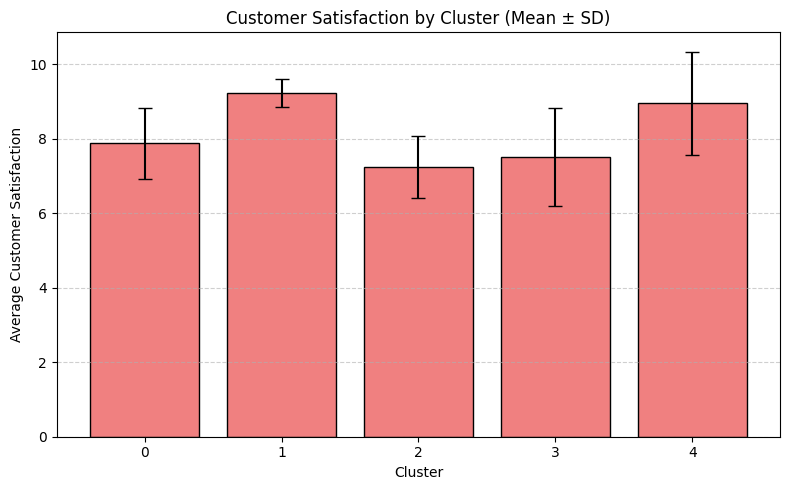

In [17]:
# Mean satisfaction per cluster for bar + error bars
cluster_means = df.groupby('cluster')['avg_customer_satisfaction'].mean()
cluster_std = df.groupby('cluster')['avg_customer_satisfaction'].std()

plt.figure(figsize=(8, 5))
plt.bar(cluster_means.index, cluster_means, yerr=cluster_std, capsize=5, color='lightcoral', edgecolor='black')
plt.title('Customer Satisfaction by Cluster (Mean ± SD)')
plt.xlabel('Cluster')
plt.ylabel('Average Customer Satisfaction')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

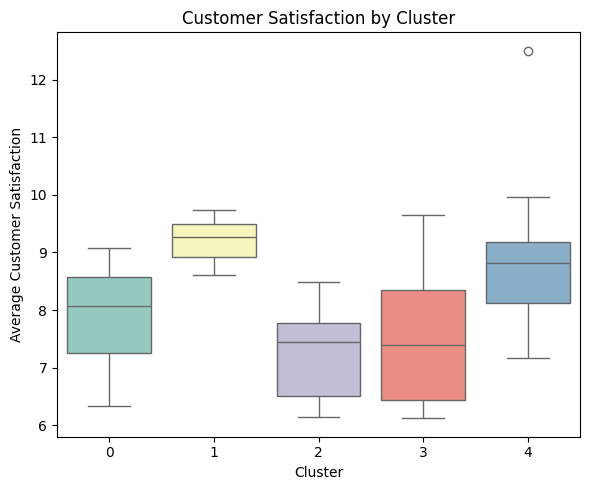

In [24]:
plt.figure(figsize=(6, 5))
sns.boxplot(
    data=df,
    x='cluster',
    y='avg_customer_satisfaction',
    hue='cluster', 
    palette='Set3',
    legend=False
)
plt.title('Customer Satisfaction by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Customer Satisfaction')
plt.tight_layout()
plt.show()


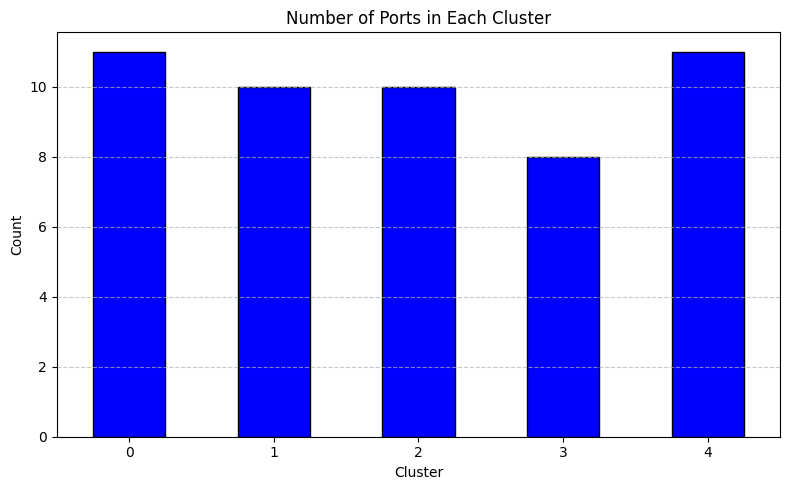

In [19]:
# bar plot
plt.figure(figsize=(8, 5))
df['cluster'].value_counts().sort_index().plot(kind='bar', color='blue', edgecolor='black')
plt.title('Number of Ports in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

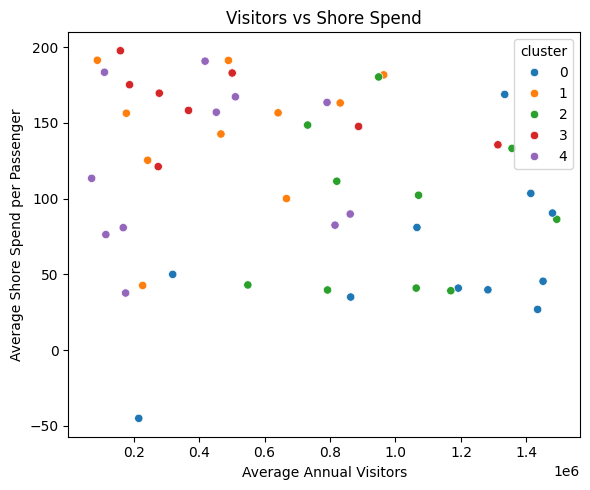

In [20]:
# scatterplot
plt.figure(figsize=(6, 5))
sns.scatterplot(
    data=df,
    x='avg_annual_visitors',
    y='avg_shore_spend_per_passenger',
    hue='cluster',
    palette='tab10'
)
plt.title('Visitors vs Shore Spend')
plt.xlabel('Average Annual Visitors')
plt.ylabel('Average Shore Spend per Passenger')
plt.tight_layout()
plt.show()